### Esercitazione 26 - Stagionalità e Trend
#### Argomenti

* Periodicità (stagionalità) nelle osservazioni di serie temporali di dati
* Trend delle stagionalità
* Implementazione di un algoritmo per la ricerca automatica del miglior periodo temporale che possa
rappresentare i prossimi movimenti del prezzo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from matplotlib import rcParams
from datetime import datetime, timedelta
from Historic_Crypto import HistoricalData
import talib

In [2]:
end_date = datetime.now()
start_date = end_date - timedelta(days=180)
candles = HistoricalData(
    ticker='BTC-EUR',
    granularity=3600 * 24,
    start_date=start_date.strftime('%Y-%m-%d-%H-%M'),
    end_date=end_date.strftime('%Y-%m-%d-%H-%M'),
    verbose=False
).retrieve_data()

In [3]:
candles['tp'] = (candles.high + candles.close + candles.low) / 3

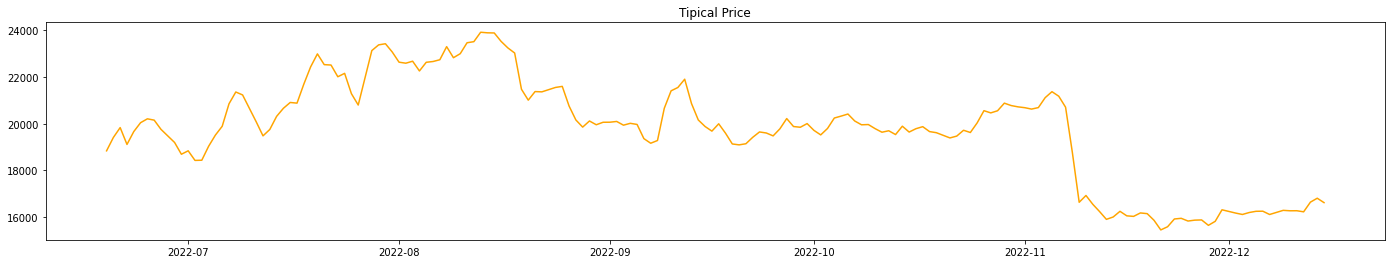

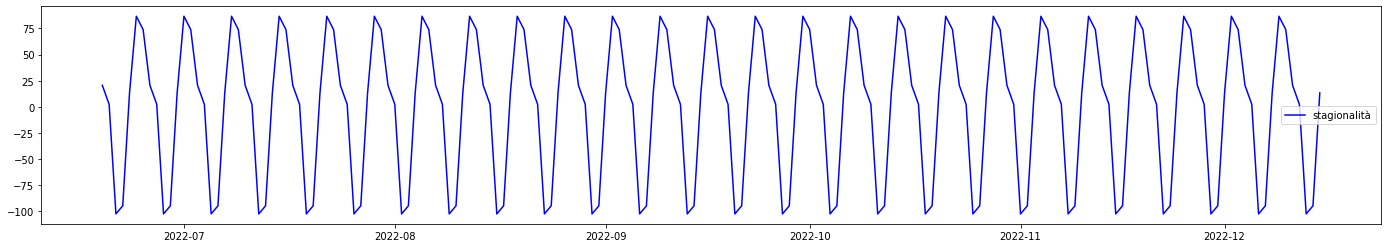

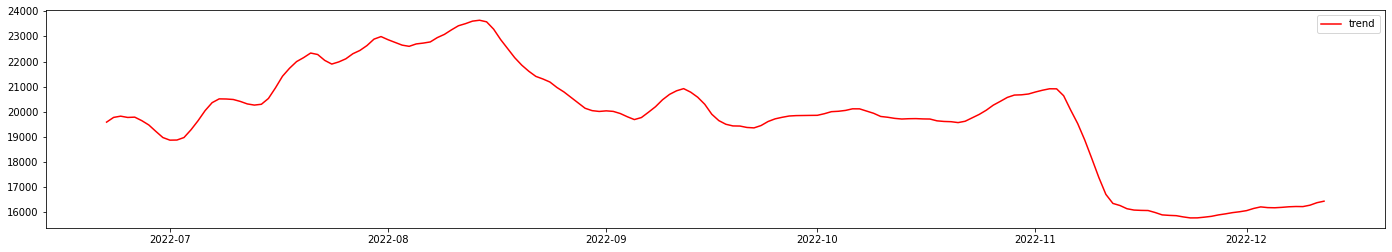

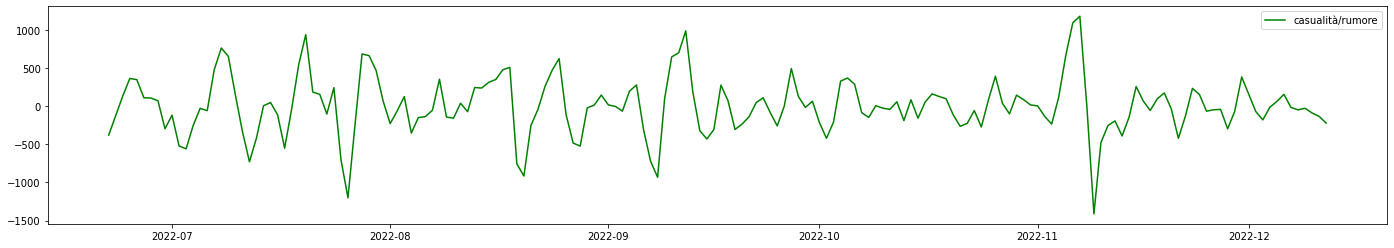

In [4]:
decompositions_add = sm.tsa.seasonal_decompose(candles.tp)

rcParams["figure.figsize"] = 24, 4
plt.plot(candles.tp, color='orange')
plt.title('Tipical Price')
plt.show()
plt.plot(decompositions_add.seasonal, color='blue', label='stagionalità')
plt.legend()
plt.show()
plt.plot(decompositions_add.trend, color='red', label='trend')
plt.legend()
plt.show()
plt.plot(decompositions_add.resid, color='green', label='casualità/rumore')
plt.legend()
plt.show()

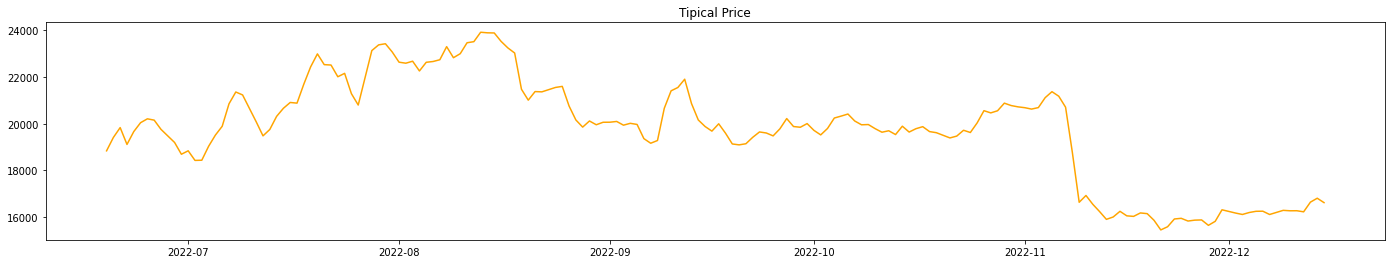

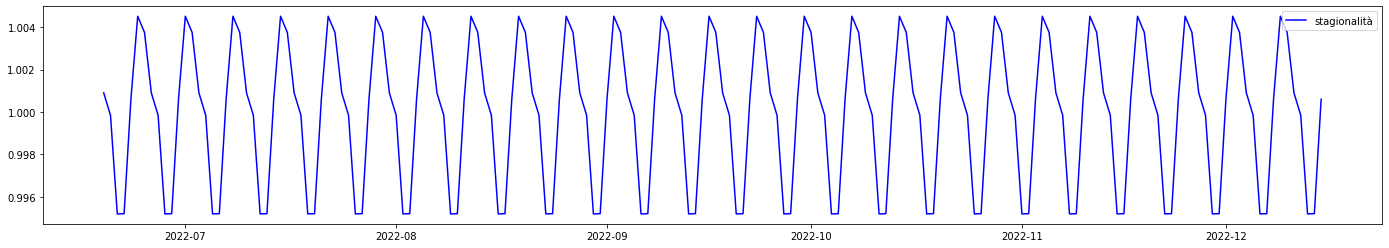

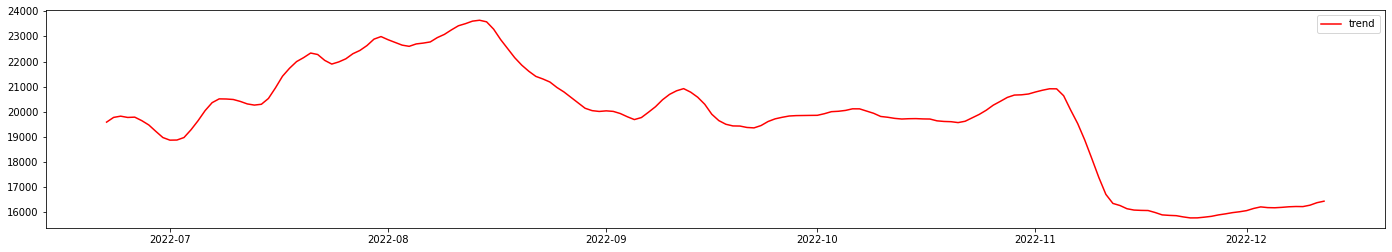

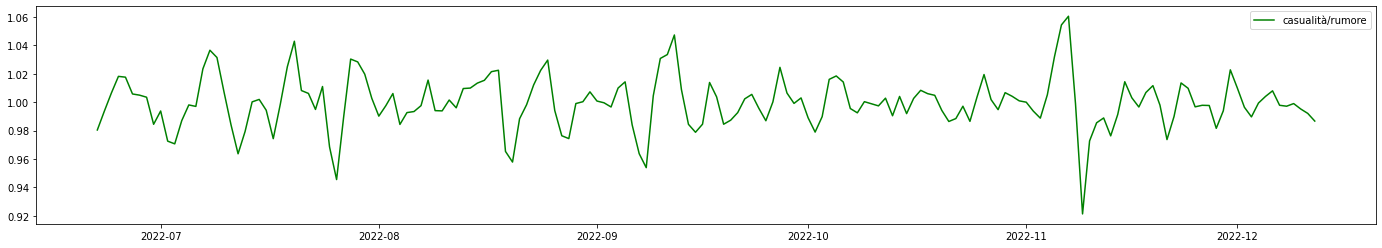

In [5]:
decompositions_mul = sm.tsa.seasonal_decompose(candles.tp, model='multiplicative')

rcParams["figure.figsize"] = 24, 4
plt.plot(candles.tp, color='orange')
plt.title('Tipical Price')
plt.show()
plt.plot(decompositions_mul.seasonal, color='blue', label='stagionalità')
plt.legend()
plt.show()
plt.plot(decompositions_mul.trend, color='red', label='trend')
plt.legend()
plt.show()
plt.plot(decompositions_mul.resid, color='green', label='casualità/rumore')
plt.legend()
plt.show()

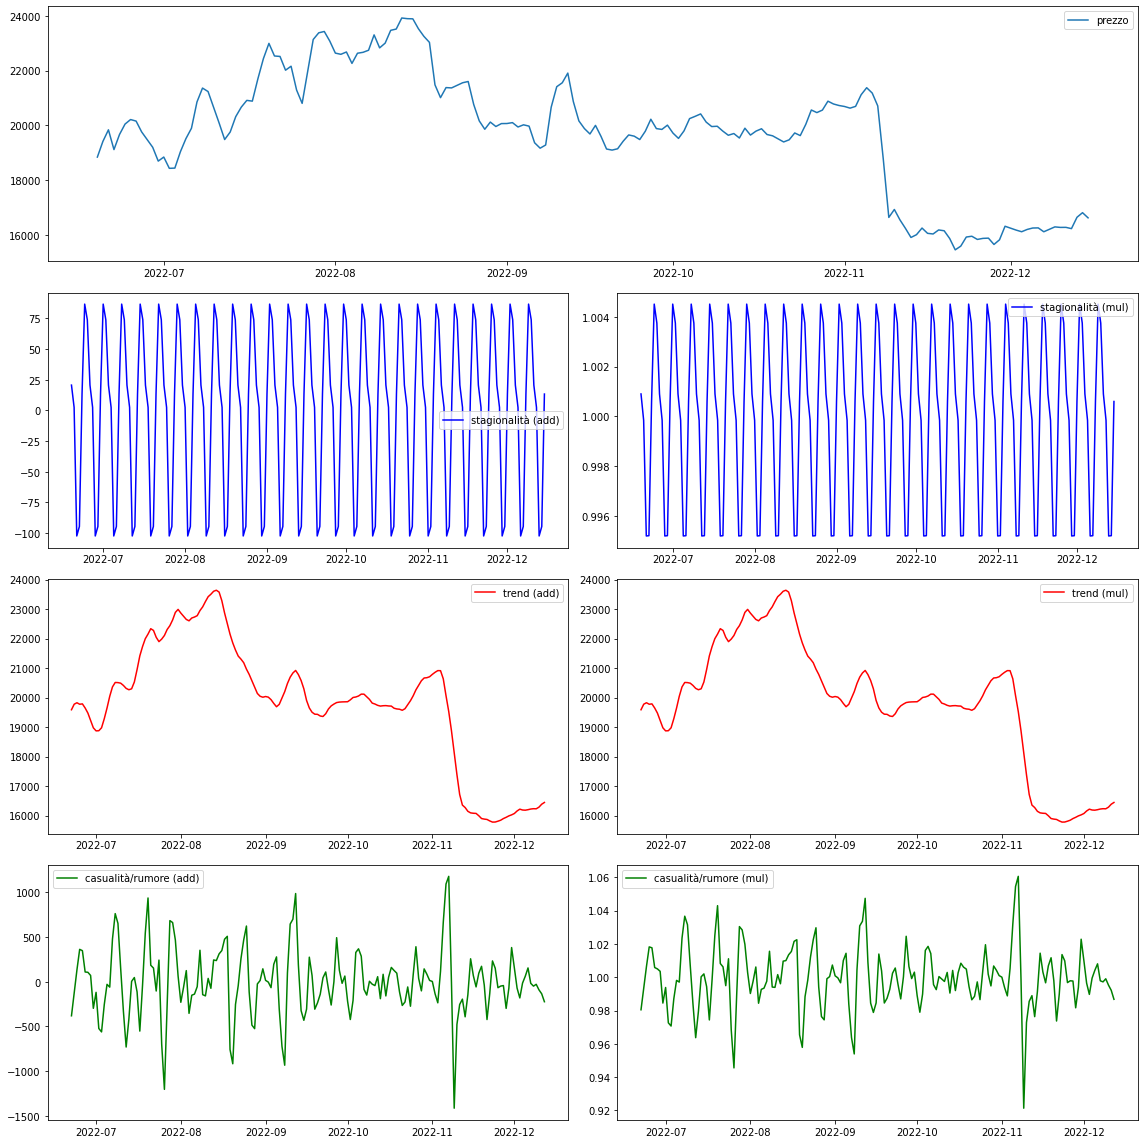

In [6]:
fig = plt.figure(figsize=(16, 16))
gs = fig.add_gridspec(4, 2)
price = fig.add_subplot(gs[0, :])
add_1 = fig.add_subplot(gs[1, 0])
add_2 = fig.add_subplot(gs[2, 0])
add_3 = fig.add_subplot(gs[3, 0])
mul_1 = fig.add_subplot(gs[1, 1])
mul_2 = fig.add_subplot(gs[2, 1])
mul_3 = fig.add_subplot(gs[3, 1])

price.plot(candles.tp, label='prezzo')
price.legend()
add_1.plot(decompositions_add.seasonal, color='blue', label='stagionalità (add)')
add_1.legend()
add_2.plot(decompositions_add.trend, color='red', label='trend (add)')
add_2.legend()
add_3.plot(decompositions_add.resid, color='green', label='casualità/rumore (add)')
add_3.legend()
mul_1.plot(decompositions_mul.seasonal, color='blue', label='stagionalità (mul)')
mul_1.legend()
mul_2.plot(decompositions_mul.trend, color='red', label='trend (mul)')
mul_2.legend()
mul_3.plot(decompositions_mul.resid, color='green', label='casualità/rumore (mul)')
mul_3.legend()

plt.tight_layout()
plt.show()

In [7]:
add_errs = 9e99
add_id = -1

mul_errs = 9e99
mul_id = -1

for i in range(2, int(len(candles) / 2)):
    decompositions_add = sm.tsa.seasonal_decompose(candles.tp, period=i)
    if decompositions_add.resid.abs().mean() < add_errs:
        add_errs = decompositions_add.resid.abs().mean()
        add_id = i
    decompositions_mul = sm.tsa.seasonal_decompose(candles.tp, period=i, model='multiplicative')
    if decompositions_mul.resid.abs().mean() < mul_errs:
        mul_errs = decompositions_mul.resid.abs().mean()
        mul_id = i

print('periodo con residuo più basso (add):', add_id)
print('periodo con residuo più basso (mul):', mul_id)

periodo con residuo più basso (add): 2
periodo con residuo più basso (mul): 21


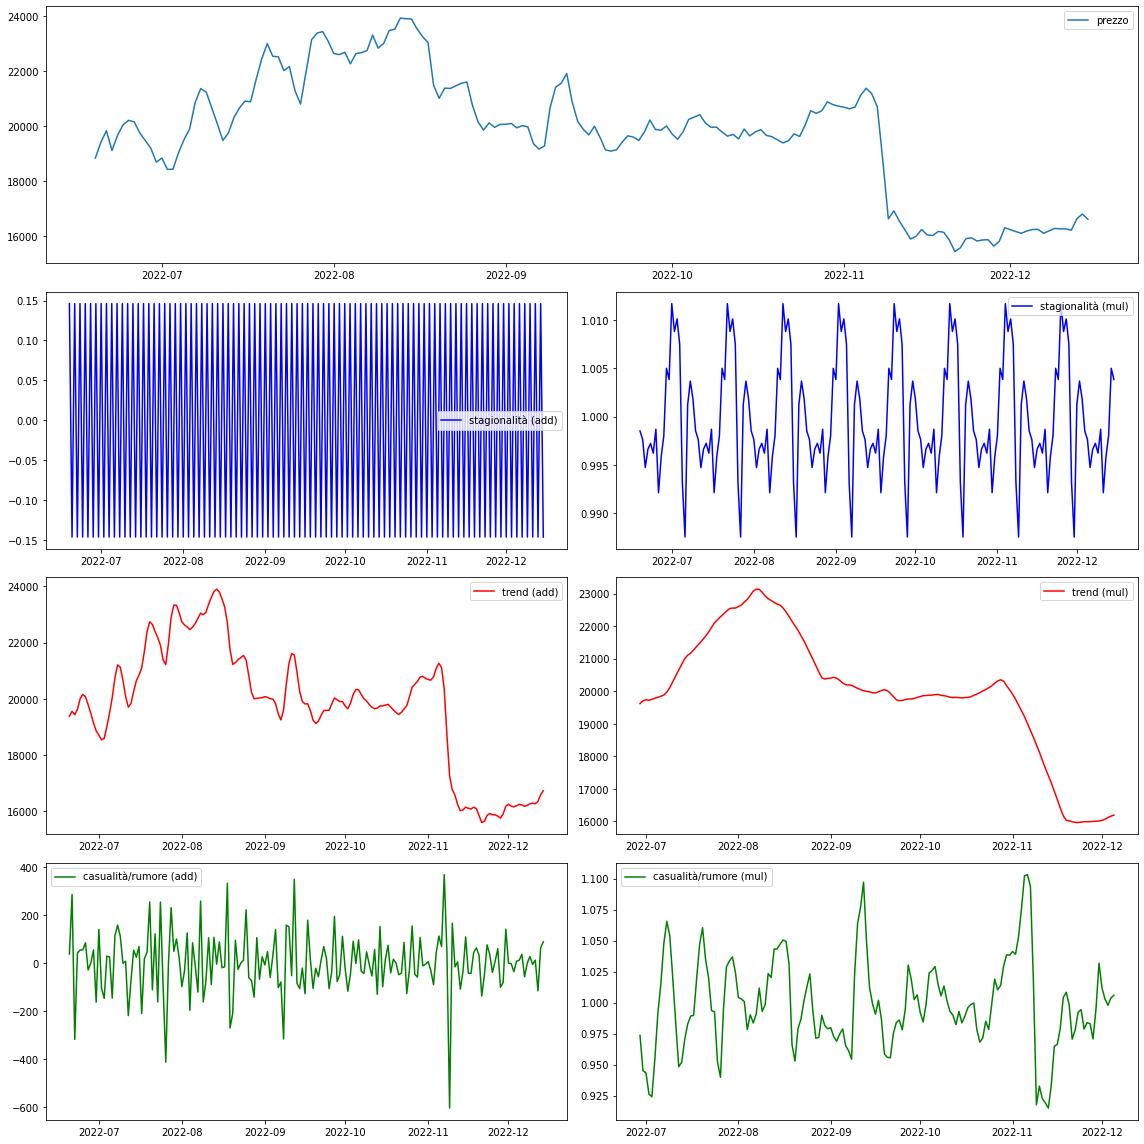

In [8]:
decompositions_add = sm.tsa.seasonal_decompose(candles.tp, period=add_id)
decompositions_mul = sm.tsa.seasonal_decompose(candles.tp, period=mul_id, model='multiplicative')

fig = plt.figure(figsize=(16, 16))
gs = fig.add_gridspec(4, 2)
price = fig.add_subplot(gs[0, :])
add_1 = fig.add_subplot(gs[1, 0])
add_2 = fig.add_subplot(gs[2, 0])
add_3 = fig.add_subplot(gs[3, 0])
mul_1 = fig.add_subplot(gs[1, 1])
mul_2 = fig.add_subplot(gs[2, 1])
mul_3 = fig.add_subplot(gs[3, 1])

price.plot(candles.tp, label='prezzo')
price.legend()
add_1.plot(decompositions_add.seasonal, color='blue', label='stagionalità (add)')
add_1.legend()
add_2.plot(decompositions_add.trend, color='red', label='trend (add)')
add_2.legend()
add_3.plot(decompositions_add.resid, color='green', label='casualità/rumore (add)')
add_3.legend()
mul_1.plot(decompositions_mul.seasonal, color='blue', label='stagionalità (mul)')
mul_1.legend()
mul_2.plot(decompositions_mul.trend, color='red', label='trend (mul)')
mul_2.legend()
mul_3.plot(decompositions_mul.resid, color='green', label='casualità/rumore (mul)')
mul_3.legend()

plt.tight_layout()
plt.show()

In [9]:
dftest = adfuller(candles.tp, autolag='AIC', regression='ctt')
print('Test ADFuller = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')

for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v < dftest[0] else '', 100 - int(k[:-1])))

Test ADFuller = -3.415
P-value = 0.136
Critical values :
	1%: -4.437421985498653 - The data is not stationary with 99% confidence
	5%: -3.865983268427406 - The data is not stationary with 95% confidence
	10%: -3.573997876310873 - The data is not stationary with 90% confidence


In [11]:
detrend_tp_add = candles.tp - decompositions_add.trend
detrend_tp_mul = candles.tp - decompositions_mul.trend

dftest = adfuller(detrend_tp_add.dropna(), autolag='AIC', regression='ctt')
print('Test ADFuller su TP a meno della componente trend {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - i dati sono {} stazionari con {}% di confidenza'.format(k, v, 'non' if v<dftest[0] else '', 100-int(k[:-1])))

print('')

dftest = adfuller(detrend_tp_mul.dropna(), autolag='AIC', regression='ctt')
print('Test ADFuller su TP a meno della componente trend {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
for k, v in dftest[4].items():
    print('\t{}: {} - i dati sono {} stazionari con {}% di confidenza'.format(k, v, 'non' if v<dftest[0] else '', 100-int(k[:-1])))

Test ADFuller su TP a meno della componente trend -7.630
P-value = 0.000
Critical values :
	1%: -4.441876483611357 - i dati sono  stazionari con 99% di confidenza
	5%: -3.868226716534302 - i dati sono  stazionari con 95% di confidenza
	10%: -3.5753772072435144 - i dati sono  stazionari con 90% di confidenza

Test ADFuller su TP a meno della componente trend -6.461
P-value = 0.000
	1%: -4.445992554939873 - i dati sono  stazionari con 99% di confidenza
	5%: -3.870298157062626 - i dati sono  stazionari con 95% di confidenza
	10%: -3.576650164723277 - i dati sono  stazionari con 90% di confidenza


In [12]:
detrend_deseason_tp_add = candles.tp - decompositions_add.trend - decompositions_add.seasonal
detrend_deseason_tp_mul = candles.tp - decompositions_mul.trend - decompositions_mul.seasonal

dftest = adfuller(detrend_deseason_tp_add.dropna(), autolag='AIC', regression='ctt')
print('Test ADFuller su TP a meno della componente trend {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
for k, v in dftest[4].items():
    print('\t{}: {} - i dati sono {} stazionari con {}% di confidenza'.format(k, v, 'non' if v<dftest[0] else '', 100-int(k[:-1])))

print('')

dftest = adfuller(detrend_deseason_tp_mul.dropna(), autolag='AIC', regression='ctt')
print('Test ADFuller su TP a meno della componente trend {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
for k, v in dftest[4].items():
    print('\t{}: {} - i dati sono {} stazionari con {}% di confidenza'.format(k, v, 'non' if v<dftest[0] else '', 100-int(k[:-1])))

Test ADFuller su TP a meno della componente trend -7.631
P-value = 0.000
	1%: -4.441876483611357 - i dati sono  stazionari con 99% di confidenza
	5%: -3.868226716534302 - i dati sono  stazionari con 95% di confidenza
	10%: -3.5753772072435144 - i dati sono  stazionari con 90% di confidenza

Test ADFuller su TP a meno della componente trend -6.461
P-value = 0.000
	1%: -4.445992554939873 - i dati sono  stazionari con 99% di confidenza
	5%: -3.870298157062626 - i dati sono  stazionari con 95% di confidenza
	10%: -3.576650164723277 - i dati sono  stazionari con 90% di confidenza
